# Report

## Setup

In [1]:
import pickle
import pandas as pd
import altair as alt

from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

## 1 Introduction and data

> REMOVE THE FOLLOWING TEXT

This section includes an introduction to the project motivation, data, and research question.
Describe the data and definitions of key variables.

It should also include some exploratory data analysis.

All of the EDA won't fit in the paper, so focus on the EDA for the response variable and a few other interesting variables and relationships.

### 1.1 Introduction and Motivation

For our project we have chosen a dataset about the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in southern California. 

Dalmatian toadflax was introduced to North America in the 1800s, presumably as ornamental plants and for use in fabrics and folk remedies. The species is now widespread in large parts of the USA and Canada. A lack of natural enemies is seen as one reason why plant species become invasive pests when they are introduced into areas outside their original 
range. Due to its extensive root system and prolific seed production, it can thrive and spread rapidly in a variety of ecosystems, including grasslands and roadsides. 

Invasive plants such as Dalmatian toadflax can cause ecological problems. On the one hand, it can displace native plants and as a result reduce biodiversity. It can also have an impact on the availability of habitat for native animals as the dominance of Dalmatian toadflax can disrupt the strucutre and function of ecosystems. On the other hand, we have to think of the soil composition. Invasive plants can alter the soil by removing nutrients which can have an impact on the native vegetation. Moreover, Dalmatian toadflax can tend to accumulate dry material, which can increase fire hazard.

Therefore, attempts are being made to control the spread of Dalmatian toadflax. During the 1950s-1960s studies with herbicides have been conducted. Because of the variable responses, differenct herbicides have been recommended e.g. borate-chlorate mixtures, different acids or silvex. In addition, the use of adapted grasses in competition with toadflax was also investigated.
However, the studies concluded that chemical control alone is not practical for large infestations and emphasized the need for integrated control strategies that take into account both chemical and ecological factors.
Other studies have investigated the effect of prescribed fires on the spread of Dalmatian toadflax. However, these studies also concluded that fire does not reduce populations of Dalmatian toadflax.

Nowadays, biological control using herbivorous insects such as Mecinus janthiniformis is the most promising method of controlling invasive weeds in a long-term, cost-effective and sustainable way.
These insects can infest plants, seeds, roots, leaves and stems. Continuous effect and permanent control, as well as the good combination with other control methods and the self-spreading, but also long-term and environmentally friendly nature are just some of the advantages that should be mentioned.
However, studies and tests on the success of these natural control agents are very cost-intensive and time-consuming.
Nevertheless, the advantages outweigh the disadvantages, which is why the use of herbivorous insects to control invasive plants is widespread today.

In our case, weevil Mecinus janthiniformis populations were released in the investigated area of southern California.
We aim to find patterns and trends within the dataset and define factors and potential predictors associated with the growth of Dalmatian toadflax and the spread of weevil populations.

**References**

Jacobs, J. S., & Sheley, R. L. (2003). Prescribed fire effects on dalmation toadflax. Rangeland Ecology & Management/Journal of Range Management Archives, 56(2), 193-197.: https://journals.uair.arizona.edu/index.php/jrm/article/download/9791/9403

Robocker, W. C. (1968). Control of Dalmation Toadflax. Rangeland Ecology & Management/Journal of Range Management Archives, 21(2), 94-98.: https://journals.uair.arizona.edu/index.php/jrm/article/viewFile/5580/5190

Sing, S. E., De Clerck-Floate, R. A., Hansen, R. W., Pearce, H., Randall, C. B., Toševski, I., & Ward, S. M. (2016). Biology and biological control of Dalmatian and yellow toadflax (p. 141). Morgantown, West Virginia: USDA Forest Service, Forest Health Technology Enterprise Team.: https://www.fs.usda.gov/rm/pubs_journals/2016/rmrs_2016_sing_s001.pdf

Willden, S. A., & Evans, E. W. (2019). Summer development and survivorship of the weed biocontrol agent, Mecinus janthiniformis (Coleoptera: Curculionidae), within stems of its host, Dalmatian toadflax (Lamiales: Plantaginaceae), in Utah. Environmental entomology, 48(3), 533-539.

### 1.2 Research Questions and Hypothesis

**Linear Regression:**

We want to identify patterns and trends within our dataset and define factors or potential predictors associated with the growth of Dalmatian toadflax. Our model aims to predict the main stem length of Dalmatian toadflax based on different traits.

**Logistic Regression:**

For the logistic regression we want to predict, if a plant is infested by weevil populations or not. Therefore, we use different predictor variables and try to identify which characteristics of a plant are most likely to indicate a possible infestation.

Our **hypothesis** is that the spread of weevil populations contributes to the reduction of Dalmatian toadflax vegetation in the area and reduces the size of the plants. 

If it turns out that weevil cultivation does indeed influence the containment of the spread, this could serve as a basis for the decision to increase the use of herbivorous insects such as Mecinus janthiniformis to control the growth of Dalmatian toadflax.

### 1.3 Data Origin

The dataset was originally collected by Lincoln Smith starting in 2008 and published by the Agricultural Research Service (Department of Agriculture). 

Every year an observational study was conducted on six different sites within the investigated area with approximately 7-78 observations per site and year. The plants were collected, examined, measured and dissected in the labratory. Each observation in the datasets represents a plant in the investigated area.

Link to the data source: https://catalog.data.gov/dataset/data-from-release-and-establishment-of-the-weevil-mecinus-janthiniformis-for-biological-co

### 1.4 Data Corrections

To prepare the data for our analysis we applied various corrections, including standardization and therefore also renaming columns for consistency. We also converted tip of stem broken into a categorical variable by assigning value 1 for a broken or cut tip and value 0 for an intact tip. Moreover we removed non relevant columns and columns that don´t contain any data.
These are the remaining variables with which we proceeded:

In [46]:
df = pd.read_csv('../data/interim/dissections_2012_HV_corrected.csv', index_col=0)
df.columns.to_list()

['main_stem_length_in_cm',
 'total_meja',
 'infested',
 'tip_of_stem_broken',
 'side_branches_in_cm',
 'total_number_adults',
 'stem_diam_bottom_in_cm',
 'diam_top_in_cm']

### 1.5 Definition of Key Variables

From the data set we chose the following variables that contain relevant informatin about the size of the plant or state of infestation:

- **Main stem length in cm:** Describes the length of the stem, excluding side branches.
- **Stem diam bottom in cm:** Describes the stem diameter at the bottom of the plant.
- **Diam top in cm:** Describes the stem diameter at the top of the plant.
- **Side branches in cm:** Describes the cumulative length of side branches that were examined.
- **Total meja:** Describes the sum of the number of empty chambers, dead larvae, dead pupae, live pupa, live larva and total number of adults.
- **Tip of stem broken:** Describes wether the stem tip is broken or cut (1 = broken/cut, 0 = intact stem tip)
- **Infested:** Describes wether a plant is infested or not (1 = infested by M. janthiniformis, 0 = not infested)
- **Total number adults:** Describes the number of live and dead adults.

Later we use forward selection to decide which variables are most suitable for our models.

#### 1.5.1 Linear Regression

The following variables were identified as possible predictor variables for linear regression. We define our possible predictor variables in a list called features.

- stem_diam_bottom_in_cm
- total_meja
- diam_top_in_cm
- side_branches_in_cm
- tip_of_stem_broken
- infested
- total_number_adults'

We want to use these variables to predict the main stem length of the plants and therefore define them as X. Y is assigned a series containing the values from the column main stem length that is defined by the y_label_lin variable.

In [4]:
y_label_lin = 'main_stem_length_in_cm'

features_lin = ['stem_diam_bottom_in_cm', 'diam_top_in_cm', 'side_branches_in_cm', 'total_meja', 'tip_of_stem_broken', 'infested', 'total_number_adults']

#### 1.5.1 Logistic Regression

For the logistic regression analysis, we want to predict whether a plant is infested or not in order to analyze whether plants infested by weevils are more likely to remain smaller and if weevils are really useful and effective as natural control agents. Possible predictor variables are again defined in a features list:

- main_stem_length_cm
- stem_diam_bottom_cm
- side_branches_cm
- diam_top_cm
- tip_of_stem_broken

As we want to predict wether a plant is infested or not we cannot use features that directly indicate an infestation e.g. total_meja', 'total_number_adults', 'meja_per_100_cm'. Therefore we use all features that are not directly indicating an infestation.

In [5]:
y_label_log = 'infested'

features_log = ['main_stem_length_in_cm', 'stem_diam_bottom_in_cm', 'side_branches_in_cm', 'diam_top_in_cm', 'tip_of_stem_broken']

### 1.6 Highlights from EDA

In [6]:
df = pd.read_csv('../data/interim/dissections_2012_HV_corrected.csv', index_col = 0)

#### 1.6.1 Linear Regression

The following matrix provides a visual overview of the relationship between our response variable main stem length and our possible predictor variables. By looking at the scatter plots, patterns such as linear relationships, clustering or outliers can be identified. 

In [20]:
alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=[y_label_lin],
    column=['stem_diam_bottom_in_cm', 'side_branches_in_cm', 'diam_top_in_cm', 'total_meja', 'total_number_adults']
).interactive()

alt.RepeatChart(...)

We can identify that stem diam bottom and main stem length have a linear relationship. Also diam top and total meja could be helpful predictors.

In the following code cell we calculate the correlation coefficients between the columns in the DataFrame df_train and the target variable (y_label). The higher the correlation coefficient, the stronger the linear relationship between the two variables. A positive correlation indicates that as one variable increases, the other tends to increase, while a negative correlation indicates that as one variable increases, the other tends to decrease.

As we already recognized in the scatter plot matrix, stem diam bottom has the strongest linear relationship (0.66) with the response variable main stem length. This indicates that stem diam bottom will be a suitable predictor variable.

In [8]:
corr = df.corr()
corr[y_label_lin].sort_values(ascending=False)

main_stem_length_in_cm    1.000000
stem_diam_bottom_in_cm    0.660344
infested                  0.103211
total_meja                0.026979
tip_of_stem_broken       -0.071523
total_number_adults      -0.094173
diam_top_in_cm           -0.167899
side_branches_in_cm      -0.256441
Name: main_stem_length_in_cm, dtype: float64

#### 1.6.1 Logistic Regression

To get more detailed information we are generating a grid of area charts using Altair, where each chart represents the distribution of quantitative variables, specified in y_label_log and features_log, in the DataFrame df_train_log. The areas are colored based on the values in the "infested" column.

In [66]:
alt.Chart(df).mark_area(
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=alt.Bin(maxbins=20)),
    alt.Y('count()', stack = None),
    alt.Color('infested:N'),
).properties(width=250).repeat(column=['main_stem_length_in_cm', 'stem_diam_bottom_in_cm', 'diam_top_in_cm'])

alt.RepeatChart(...)

To evaluate whether there are significant differences in the main stem lengths an diam top in cm between the categories "infested" and "not infested", we created boxplot diagrams showing the distribution of the values of the variables "main stem length_in_cm" and "diam_top_in_cm" for the two categories of the variable "infested". The visualization allows a quick comparison of the distribution of main stem lengths for different the categories "infested" and "not infested".

In [43]:
basechart_main_stem = alt.Chart(df).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x=alt.Y('main_stem_length_in_cm:Q', scale=alt.Scale(zero=True)),
    y='infested:N',  
).properties(width=400, height=200)

basechart_diam_top = alt.Chart(df).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x=alt.Y('diam_top_in_cm:Q', scale=alt.Scale(zero=True)),
    y='infested:N',
).properties(width=400, height=200)

final_chart = alt.hconcat(basechart_main_stem, basechart_diam_top)
final_chart

alt.HConcatChart(...)

The visualization allows a quick comparison of the distribution of main stem length and diam top for the different categories "infested" and "not infested". For main stem length we can observe that the distribution of infested plants is more dense arround the median. Moreover, infested plants tend to have a larger diam top probably due to the tip of stem being broken or cut.

## 2 Methodology

### 2.1 Imputation

Using df.info() method, we quickly recognized that columns diam_top_in_cm and side_branches_in_cm only contain fewer values.
See chart below:

In [53]:
notna = pd.DataFrame(df.notna().sum()).rename(columns={0: "count"})
notna[["%"]] = round(notna[["count"]] / len(df) * 100,1)
alt.Chart(notna.reset_index()).mark_bar().encode(
    x="count",
    y="index",
).properties(height=250)

alt.Chart(...)

We therefore can consider filling in the missing values using SimpleImputer class from Scikit-Learn.
There are three possible options now to proceed:

**Option 1: method = "reduced"**
With option 1, we omit all rows with NaN values and use a reduced data frame.

**Option 2: method = "imputed_mean"**
Option 2 uses imputation to fill in the missing values in the two specified columns. As strategy we specify mean so the missing values are replaced with the mean of each column.

**Option 3: method = "imputed_median"**
With option 3, the missing values in the two specified columns are also filled in by imputation. As a strategy, we specify the median so that the missing values are replaced by the median of each column.

We implemented two functions to either reduce our data frame by columns that were identified containing a high amount of NaN values or impute the missing values for the specified columns with mean or median values.

In addition, we implement the function split_and_save to split our data frame with the applied method into train and test data. 

### 2.2 Forward Selection

- Welche Prädiktorvariablen haben wir gewählt und warum?
- Wie sind wir zum endgültigen Modell gekommen?
- Modellauswahl und Variablenauswahl beschreiben
- Alles was wir am Modell angepasst und probiert haben

To identify the best linear and logistic regression models we implemented a function that evaluates both models.
We apply each method (reduced, imputed_mean, imputed_median) to each model and use forward selection to determine which variables are the most suitable for the respective model. The evaluation is based on the r^2 value for linear regression and ROC for logistic regression.

(See draft analysis for function definition.)

**Evaluation results:**

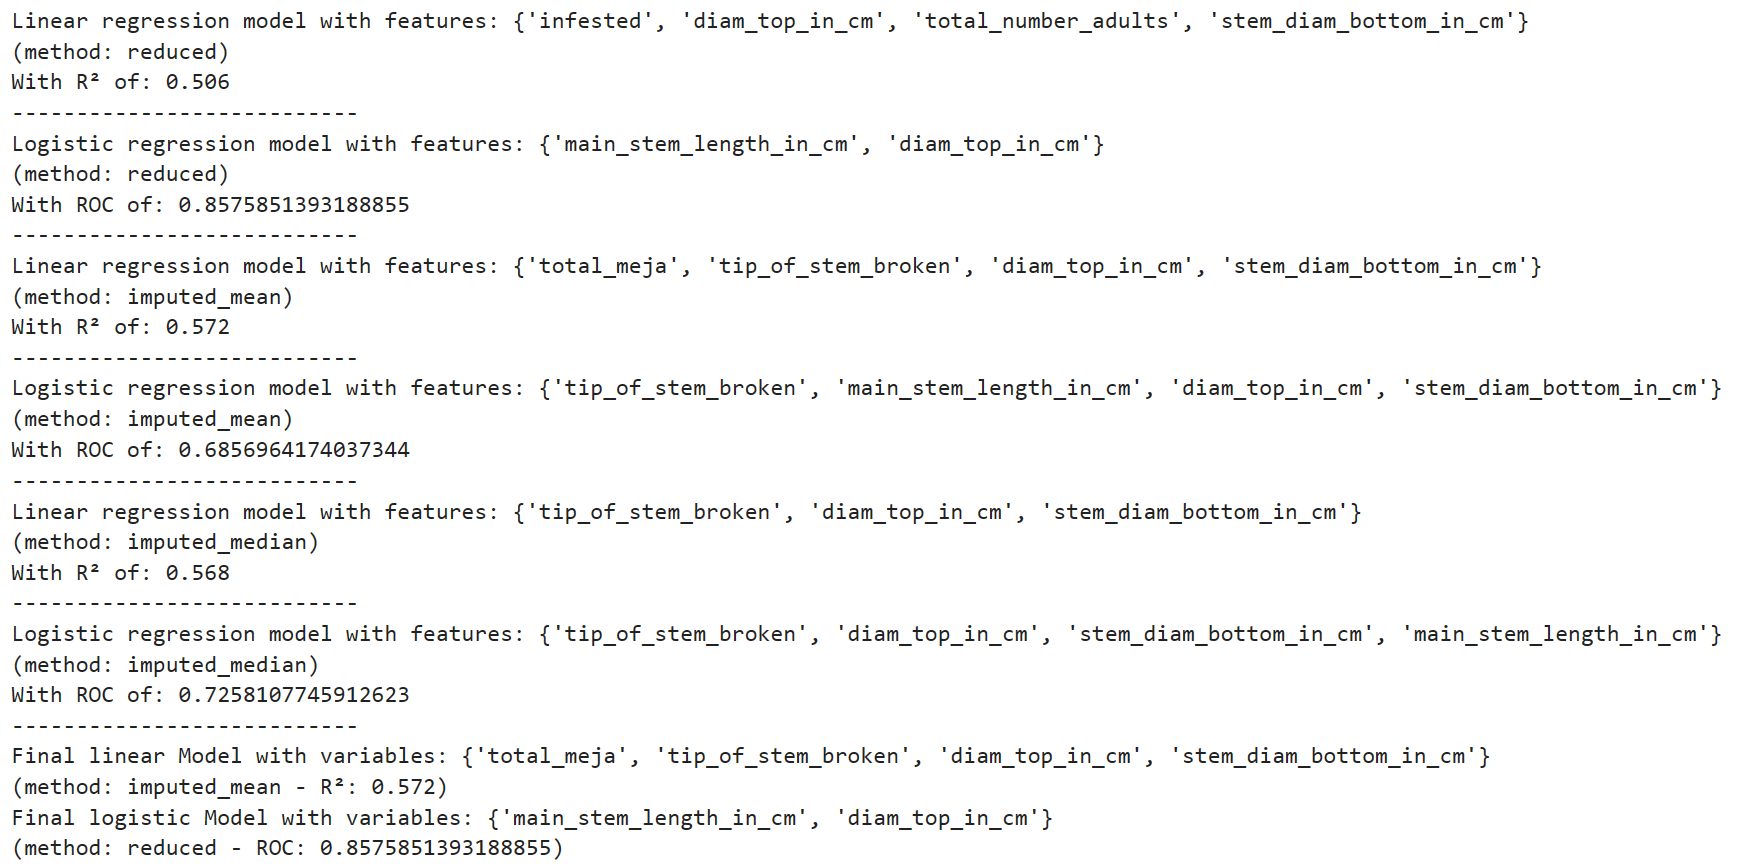

Based on the results we chose the imputed_mean method for our linear regression model. The best performance of the model can be reached using the following features to predict a plants main stem length.: 'total_meja', 'stem_diam_bottom_in_cm', 'tip_of_stem_broken', 'diam_top_in_cm'.

For our linear regression model we chose the reduced method. The best performance can be reached using the features 
'main_stem_length_in_cm', 'diam_top_in_cm' to predict wether a plant is infested or not.

We assume that a complete dataset would have yielded better results. 

### 2.3 Overfitting

In chapter 2.1 we chose the reduced method for our logistic regression model. Therefore, we have less observations in our remaining datset. We recognized that the proportion of infested and not infested plants in our dataset was imbalanced so we used overfitting to compensate the difference between value counts and balance our dataset.

We used random oversampler from imblearn. The confusion matrix showed a higher amount of false negatives compared to the prior confusion matrix without using overfitting. As we want to analyze wether weevils are effective as natural control agents, we don´t want to miss an actual infested plant and aim to optimize recall. Unfortunately, overfitting did not lead to significant improvements of our model regarding the AUC value.

### 2.4 Adjusting Thresholds

The choice of threshold for binary classification problems is an important decision and can have a significant impact on the performance of the model. Since we needed to categorize our predictions into infested or not infested, we started by setting a threshold of 0.5.
We later tried to further optimize our logistic regression model by adjusting the decision threshold to 0.3, 0.4, 0.6 or 0.7.

For 'Not Infested': Higher recall is better for true negatives. The best recall is at a threshold of 0.7. 

For 'Infested': Higher recall is better for true positives. The best recall is at a threshold of 0.3. 

Considering this, a threshold of 0.5 seemed to be a good compromise, offering a balanced recall for both 'infested' (0.88) and 'not infested' (0.59). This threshold ensures that both 'infested' and 'not infested' are identified with reasonable accuracy, without skewing too heavily towards one at the expense of the other.

<div>
<img src="../data/Classification_Report.png", width="500"/>
</div>

## 3 Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


- Unser finales Modell mit allen relevanten Statistiken und Modellgütekriterien
- Ergebnisse: Durch das Modell die Forschungsfragen und Hypothese beantworten


### 3.1 Linear Regression

In [54]:
linear_regression_model = pickle.load(open('../models/reg_model.sav', 'rb'))

In [55]:
intercept_lin = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[linear_regression_model.intercept_]}
    )

slope_lin = pd.DataFrame({
    "Name": ['total_meja', 'stem_diam_bottom_in_cm', 'tip_of_stem_broken', 'diam_top_in_cm'],
    "Coefficient": linear_regression_model.coef_}
)

table_lin = pd.concat([intercept_lin, slope_lin], ignore_index=True, sort=False)

round(table_lin, 3)

,Name,Coefficient
0,Intercept,17.953
1,total_meja,-0.269
2,stem_diam_bottom_in_cm,-8.434
3,tip_of_stem_broken,-72.268
4,diam_top_in_cm,103.899


**Interpretation of the results:**

- The intercept is approximately 17.953. This is the estimated value of the dependent variable when all independent variables are zero.
- An increase of one unit in the bottom stem diameter size is associated with an increase of about 103.899 units in the dependent variable main stem length.
- A one unit increase in total meja is associated with a decrease of approximately -0.269 units in the dependent variable main stem length.
- If the tip of stem is broken, the dependent variable main stem length will show a decrease of about -8.434 units.
- A one unit increase in the top stem diameter size is associated with a decrease of about -72.268 units in the dependent variable main stem length.

**Evaluation on test set:**

First, we used the r2_score function to calculate R² between the actual values and the predicted values. The R² value is between 0 and 1, where 1 means that the model explains all variation in the dependent variables, and 0 means that the model has no explanatory power beyond predicting the average. An **R² value of 0.572** shows that about 57% of the variations in the actual values can be explained by the model. This indicates that the model has moderate success in explaining the observed variations. However, there is still room for improvement as more than 43% of the variations are not explained by the model.

The Root Mean Squared Error indicates the average size of the absolute deviations between the actual and predicted values. A lower RMSE indicates more accurate predictions. In our case, the **RMSE of 16.114 cm** means that the average deviation between the actual and predicted values is about 16.114 cm.
Considering that the minimum main stem length is 2 cm, the maximum main stem length is 135 cm and the standard deviation 24.92 cm, the RMSE of 16.114 can be considered acceptable given the span of the main stem lengths.

### 3.2 Logistic Regression

In [59]:
logistic_regression_model = pickle.load(open('../models/log_model.sav', 'rb'))

In [60]:
intercept_log = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":logistic_regression_model.intercept_}
    )

slope_log = pd.DataFrame({
    "Name": ['main_stem_length_in_cm', 'diam_top_in_cm'],
    "Coefficient": logistic_regression_model.coef_[0]}
)

table_log = pd.concat([intercept_log, slope_log], ignore_index=True, sort=False)

round(table_log, 3)

,Name,Coefficient
0,Intercept,4.169
1,main_stem_length_in_cm,-0.066
2,diam_top_in_cm,3.727


**Interpretation of the results:**

- The intercept is approximately 4.169. This is the expected log odds value when all other independent variables are zero. In this case, it's a relatively high positive number, which suggests a high baseline probability of the outcome occurring when the other variables are not in play.
- The negative coefficient for "main_stem_length_in_cm" of -0.066 indicates that as the main stem length increases, the likelihood of the outcome decreases.
- The positive coefficient for "diam_top_in_cm" of 3.727 indicates that as the diameter of the stem tip increases, the likelihood of the outcome significantly increases.

**Evaluation on test set:**

We display a confusion matrix which shows how many instances of each class have been correctly or incorrectly classified.

- True Positives: Correctly classified positive instances, in our case 50.
- True Negatives: Correctly classified negative instances, in our case 10.
- False Positives: Incorrectly classified positive instances (incorrectly identified as positive), in our case 7.
- False Negatives: Incorrectly classified negative instances (incorrectly identified as negative), in our case 7.

We want to optimize recall and aim for a low number of false negatives. In our matrix we can see false negatives are only 7 and we have a high number of correctly predicted instances.

<div>
<img src="../data/Confusion_Matrix.png", width="500"/>
</div>

To further evaluate our logistic regression model, we visualized the ROC curve (Receiver Operating Characteristic Curve). Previously, we had set the threshold value to 0.5. The ROC curve provides a visual way to observe changes in our model's classification thresholds that affect the model's performance. We plot the rate of true positives against the rate of false positives for all possible thresholds. The curve shows that our model performs well, because the higher and closer to the perfect classifier the ROC curve is, the better the model performs.

The Area Under the ROC Curve (AUC) is a performance measure which is independent of the exact classification threshold chosen. AUC is between 0 and 1, with higher numbers indicating better performance so our **AUC of 0.86** indicates that our logistic regression model is performing well.

<div>
<img src="../data/ROC_Curve.png", width="500"/>
</div>

### 3.3 Résumé regarding our Research Questions

**Linear Regression:**

For our linear regression analysis we aimed to identify patterns and trends within our dataset and define factors or potential predictors associated with the growth of Dalmatian toadflax. Our obejctive was to predict the main stem length of the plants.
Using the results of our final model we can say that especially the bottom diameter of a plant contributes to its main stem length. Also the top diameter is an indicater that can be used to predict the main stem length. If the tip of the stem is broken or cut the main stem length will show a significant decrease. The variable total meja indicates infestation and also leads to a slight decrease of the main stem length.

**Logistic Regression:**

For the logistic regression we aimed to predict, if a plant is infested by weevil populations or not. Therefore, we used different predictor variables and tried to identify which characteristics of a plant are most likely to indicate a possible infestation. 
Using the results of our final model we can identify the main stem length and top diameter as the characeristics that most likely indicate wether the plant is infested or not. Infested plants on average show a lower main stem length.

## 4 Discussion and Conclusion

The study on the release and establishment of the weevil Mecinus janthiniformis for biological control of Dalmatian toadflax in Southern California provides valuable insights into the complex interplay between invasive plant species, biological control agents and the environment.
Our hypothesis was that the spread of weevil populations contributes to the reduction of Dalmatian toadflax vegetation in the area and reduces the size of the plants.

Based on our results we recommend increasing the use of herbivorous insects such as Mecinus janthiniformis to control the growth of Dalmatian toadflax. We can confirm that there is a connection between main stem length and infestation at least in the dataset used for our analysis.
However, it is still difficult to answer wether we can proof or not proof our hypothesis. Missing detail information is the main reason for that. We can not be completely sure if the dataset contained all plants or only a sample. Therefore, no concrete statement can be made about the total number of plants in the investigated area and their potential reduction due to the spread of weevil Mecinus janthiniformis populations.

### 4.1 Achievements

After inspecting the data, we noticed that some rows were missing information. Using imputation we successfully addressed this problem. Three different methods have been introduced (reduced, imputed_mean and imputed_median) to find the most suitable approach for each of the two models.
For a effective and comprehensible way to select the appropriate features for our model we implemented various functions that automatically output the best fitting features based on forward selection using R² as a measure for linear regression and ROC for logistic regression.
For both, linear and logistic regression, we performed an extensive evaluation. We assessed our linear regression model using common metrics such as MSE, RMSE and R². For our logistic regression model we aimed to improve recall. Various options on different decision tresholds have been tested and the final model has been evaluated using ROC and AUC.

### 4.2 Limitations

In the following we want to address the limitations that apply to our model. 

1. Potential improvements through complete data: During our analysis we quickly recognized that some interesting predictor variables do have a range of misssing values. Although we tried to account for this fact using imputation, a complete data set would likely have led to potential improvements and better model performance.
2. Relation to a specific region: As the data was collected in a specific region in Southern California, the results may only be transferable to other regions to a limited extent. An idea for future work could be to include data from other regions as well.
3. External factors: For the spread and success of weevil Mecinus janthiniformis as natural control agents for the containment of dalamian toadflax, external factors such as weather and environmental influences also play a role, which cannot be planned and integrated into the model.
4. Domain knowledge: It would have been better to have more specific domain knowledge during our analysis. Although the data was accurately described in a dictionary by the data collectors, open issues arose for which we ultimately had to make assumptions. For future work clarification on unclear topics could be useful, e.g. number of total plants vs. samples in our dataset.

### 4.3 Analysis of the Results

#### 4.3.1 Linar Regression

In linear regression, the most appropriate method for dealing with missing values was the imputed_mean method, where the mean value was used to fill in the missing values in the respective columns.

The most powerful predictor variables found with forward selection are:

- stem_diam_bottom_in_cm
- diam_top_in_cm
- total_meja
- tip_of_stem_broken
  
With these variables our model is reaching a moderate performance with an R² value of 0.572. Stem diam bottom is the most influential variable as main stem length and stem diam bottom have the highest correlation.

#### 4.3.2 Logistic Regression

For the logistic regression model, we chose the reduced method as it led to the best results. In this method, all rows with missing values were omitted and therefore a reduced data set was used for the model.

The most powerful predictor variables found with forward selection are:

- main_stem_length_in_cm
- diam_top_in_cm

With these variables, our model reaches a ROC score of 0.86. Overfitting or adjusting the decision threshold did not lead to a significant increase in model performance.